<a href="https://colab.research.google.com/github/beedrumms/Exploring-Public-Responses-to-Government-COVID-19-Policies/blob/main/6)_B)_NY_Policies_and_Sentiments_Analysis_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing vader and nltk 
!pip install nltk 
!pip install vaderSentiment

In [ ]:
# import essential packages for preprocessing steps
import pandas as pd
import numpy as np
from google.colab import drive, files
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pylab import rcParams
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
obj = SentimentIntensityAnalyzer()
from datetime import datetime
import matplotlib.colors as mcolors
# Mounting google colab on drive 
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROCESSED_NEWYORK_COVID19_TWEETS.csv')    
tweets_df = data[['Datetime', 'Text', 'Text_Unprocessed']]
tweets_df.columns, tweets_df.shape # ensuring everthing read in properly

(Index(['Datetime', 'Text', 'Text_Unprocessed'], dtype='object'), (588022, 3))

In [ ]:
compound_list = []
# Using unprocessed text for better performance
for t in tweets_df['Text_Unprocessed']:
  score = obj.polarity_scores(t)
  compound_list.append(score['compound'])

In [ ]:
tweet_Sentiment_data = tweets_df.copy()
# Adding compound scores to our dataframe
tweet_Sentiment_data['Sentiment_Score'] = compound_list

# Changing the tweet sentiment dataset datetime field to datetime object
tweet_Sentiment_data['Datetime'] = pd.to_datetime(tweet_Sentiment_data['Datetime']) # converting to datetime
tweet_Sentiment_data['Datetime'] = tweet_Sentiment_data['Datetime'].dt.date # converting to just Year-Month-Day format 
tweet_Sentiment_data.Datetime.head(1), tweet_Sentiment_data.Datetime.tail(1)

(0    2021-05-30
 Name: Datetime, dtype: object, 588021    2020-04-14
 Name: Datetime, dtype: object)

In [ ]:
grouped = tweet_Sentiment_data['Sentiment_Score'].groupby(tweet_Sentiment_data['Datetime'])
compound_sentiment_daily_avgs = grouped.mean()

In [ ]:
newyork = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OxCGRT_New York.csv')

In [ ]:
newyork['Date'] = pd.to_datetime(newyork['Date']) # converting to datetime
newyork['Date'] = newyork['Date'].dt.date # converting to just Year-Month-Day format 
newyork.Date.head(1), newyork.Date.tail(1)

(0    2020-03-01
 Name: Date, dtype: object, 456    2021-05-31
 Name: Date, dtype: object)

In [ ]:
# new range = 0-100 
# new off set is 50 
# We want to change the range first 
# range is multiplication 
# current distnace between -1 and 1 is 2. So every number X 50 
# to chagne the off set - it is simple addition (every number + 50)
# range you want divided by range you have == new scaling factor 
# rescaling my sentiment scores to be on the same scale as my policy indices 
rescale = compound_sentiment_daily_avgs*50
new_compound_scores = rescale + 50 

In [ ]:
# Looking at the number of days that rank positive on the new scale (positive is 0.05+ so 52.5 on the new scale)
temp = new_compound_scores >= 52.5
positive_days = new_compound_scores[temp]
print(positive_days, 'Number of positive days:', len(positive_days)) # Only 4 positive days in New York

Datetime
2020-04-14    54.641570
2021-02-23    52.501328
Name: Sentiment_Score, dtype: float64 Number of positive days: 2


In [ ]:
# Creating visual lines for the sentiment scores that will demonstrate the neutral zone
neutral_line = []
for i in range(412):
  neutral_line.append(50)

neutral_range_t = []
for i in range(412):
  neutral_range_t.append(52.5)

neutral_range_b = []
for i in range(412):
  neutral_range_b.append(47.5)

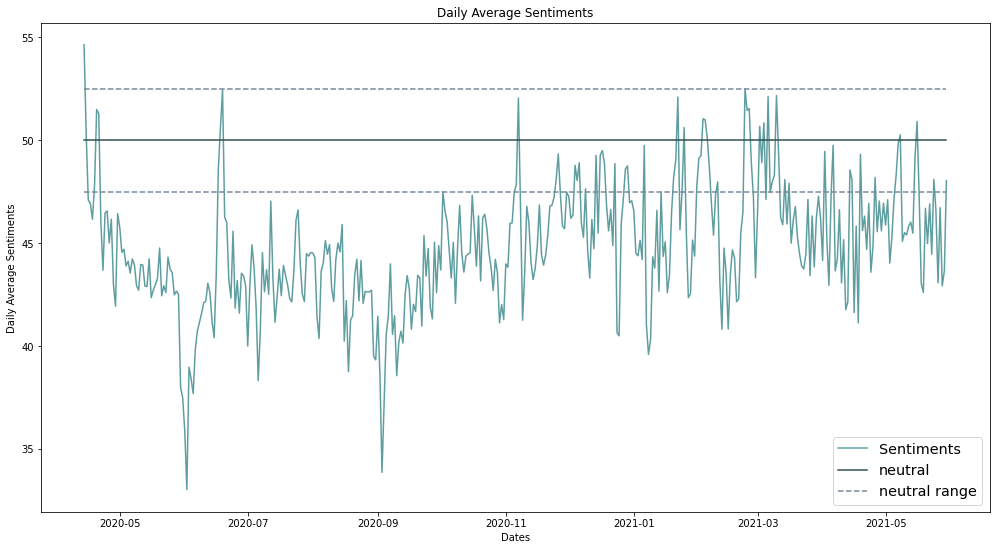

In [ ]:
# Going to visualize these sentiments over time 
x_val = new_compound_scores.index
y_val = new_compound_scores

plt.plot(x_val, y_val, color = 'cadetblue', label='Sentiments')
plt.plot(x_val, neutral_line, color = 'darkslategrey', label='neutral')
plt.plot(x_val, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed')
plt.plot(x_val, neutral_range_b, color = 'lightslategrey', linestyle='dashed')
plt.xlabel("Dates")
plt.ylabel("Daily Average Sentiments")
plt.title("Daily Average Sentiments")
plt.legend(fontsize='x-large')
plt.rc('figure', figsize=(17,10))
plt.show()

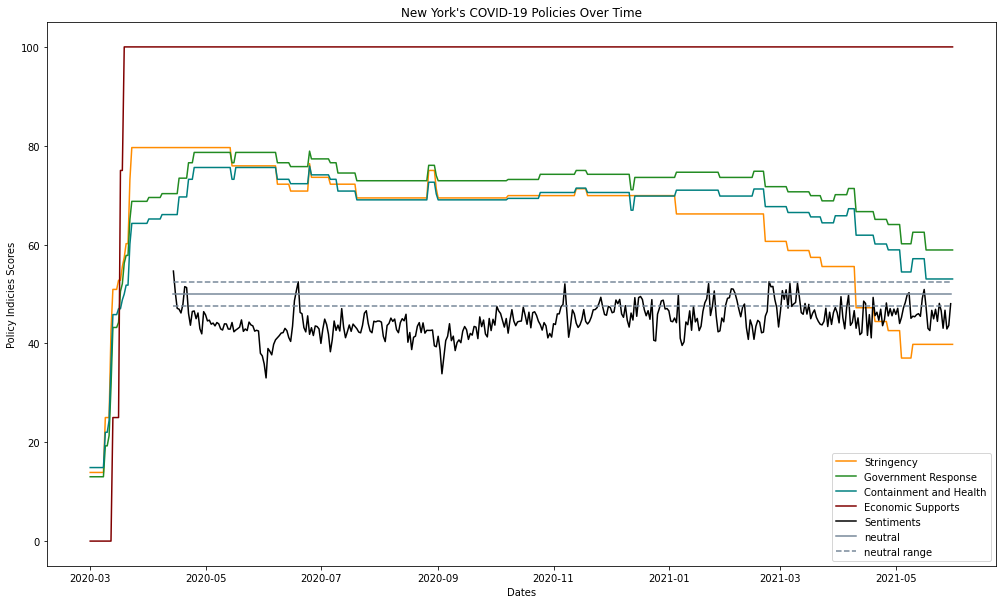

In [ ]:
date = newyork['Date'].unique()
x_val = new_compound_scores.index
y_val = new_compound_scores

stringency_NY = newyork['StringencyIndex']
gov_response_NY = newyork['GovernmentResponseIndex']
containment_health_NY = newyork['ContainmentHealthIndex']
economic_supports_NY = newyork['EconomicSupportIndex']

plt.plot(date, stringency_NY, color = 'darkorange', label = 'Stringency')
plt.plot(date, gov_response_NY, color = 'forestgreen', label = 'Government Response')
plt.plot(date, containment_health_NY, color = 'teal', label = 'Containment and Health')
plt.plot(date, economic_supports_NY, color = 'maroon', label = 'Economic Supports')

plt.plot(x_val, y_val, color = 'black', label = 'Sentiments')
plt.plot(x_val, neutral_line, color = 'lightslategrey', label='neutral')
plt.plot(x_val, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed')
plt.plot(x_val, neutral_range_b, color = 'lightslategrey', linestyle='dashed')
plt.xlabel("Dates")
plt.ylabel("Policy Indicies Scores")
plt.title("New York's COVID-19 Policies Over Time")
plt.legend()
plt.rc('figure', figsize=(25, 11))
plt.show()

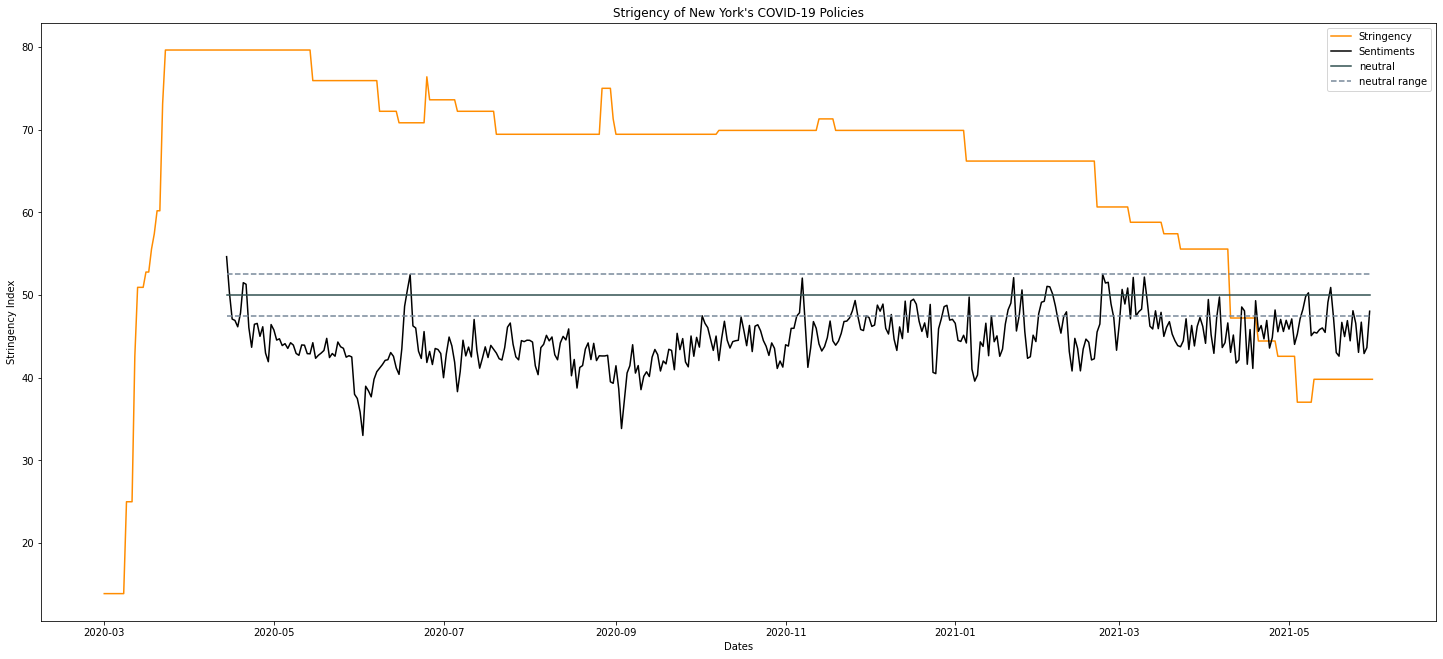

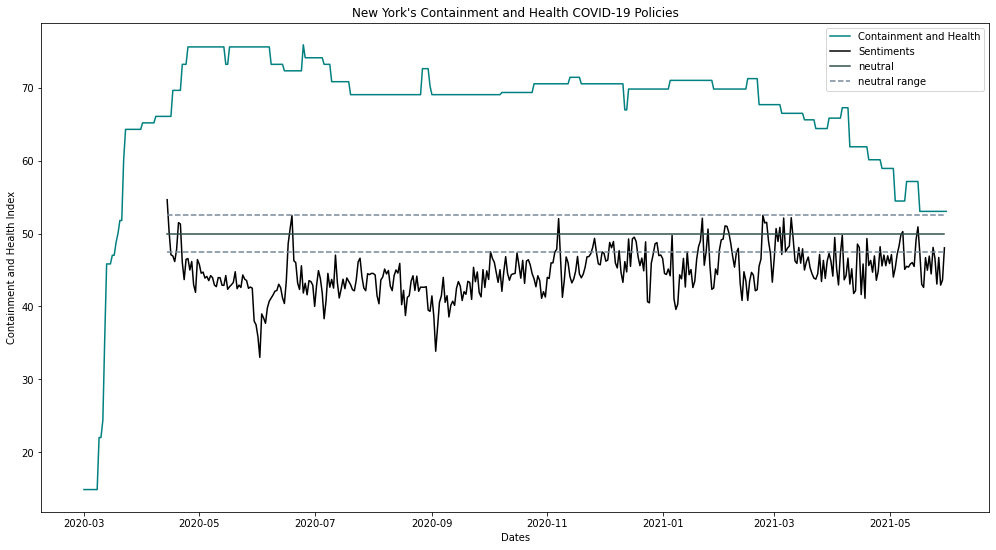

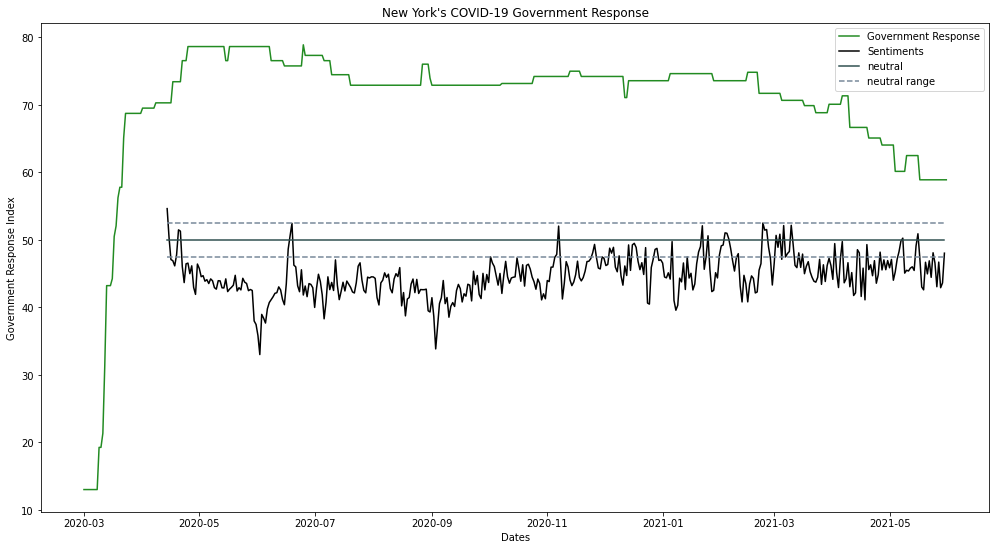

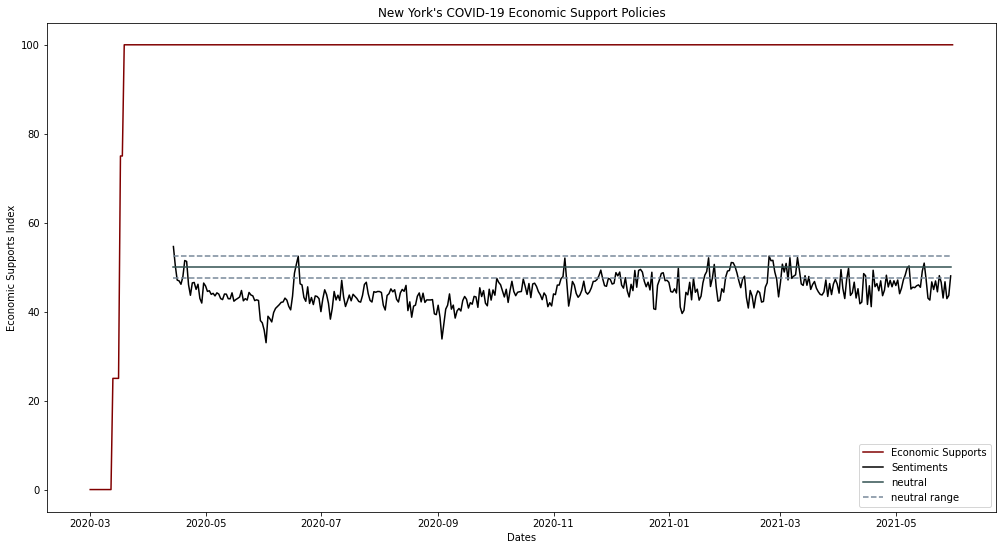

In [ ]:
date = newyork['Date'].unique()
x_val = new_compound_scores.index
y_val = new_compound_scores

stringency_NY = newyork['StringencyIndex']
plt.plot(date, stringency_NY, color = 'darkorange', label = 'Stringency')
plt.plot(x_val, y_val, color = 'black', label = 'Sentiments')
plt.plot(x_val, neutral_line, color = 'darkslategrey', label='neutral')
plt.plot(x_val, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed')
plt.plot(x_val, neutral_range_b, color = 'lightslategrey', linestyle='dashed')
plt.xlabel("Dates")
plt.ylabel("Stringency Index")
plt.title("Strigency of New York's COVID-19 Policies")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

containment_health_NY = newyork['ContainmentHealthIndex']
plt.plot(date, containment_health_NY, color = 'teal', label = 'Containment and Health')
plt.plot(x_val, y_val, color = 'black', label = 'Sentiments')
plt.plot(x_val, neutral_line, color = 'darkslategrey', label='neutral')
plt.plot(x_val, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed')
plt.plot(x_val, neutral_range_b, color = 'lightslategrey', linestyle='dashed')
plt.xlabel("Dates")
plt.ylabel("Containment and Health Index")
plt.title("New York's Containment and Health COVID-19 Policies")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

gov_response_NY = newyork['GovernmentResponseIndex']
plt.plot(date, gov_response_NY, color = 'forestgreen', label = 'Government Response')
plt.plot(x_val, y_val, color = 'black', label = 'Sentiments')
plt.plot(x_val, neutral_line, color = 'darkslategrey', label='neutral')
plt.plot(x_val, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed')
plt.plot(x_val, neutral_range_b, color = 'lightslategrey', linestyle='dashed')
plt.xlabel("Dates")
plt.ylabel("Government Response Index")
plt.title("New York's COVID-19 Government Response")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()


economic_supports_NY = newyork['EconomicSupportIndex']
plt.plot(date, economic_supports_NY, color = 'maroon', label = 'Economic Supports')
plt.plot(x_val, y_val, color = 'black', label = 'Sentiments')
plt.plot(x_val, neutral_line, color = 'darkslategrey', label='neutral')
plt.plot(x_val, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed')
plt.plot(x_val, neutral_range_b, color = 'lightslategrey', linestyle='dashed')
plt.xlabel("Dates")
plt.ylabel("Economic Supports Index")
plt.title("New York's COVID-19 Economic Support Policies")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

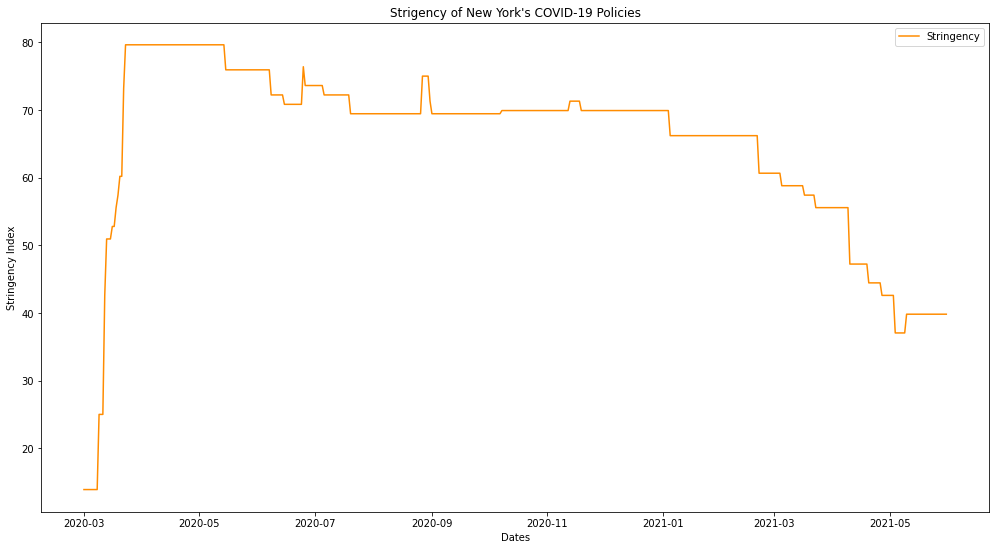

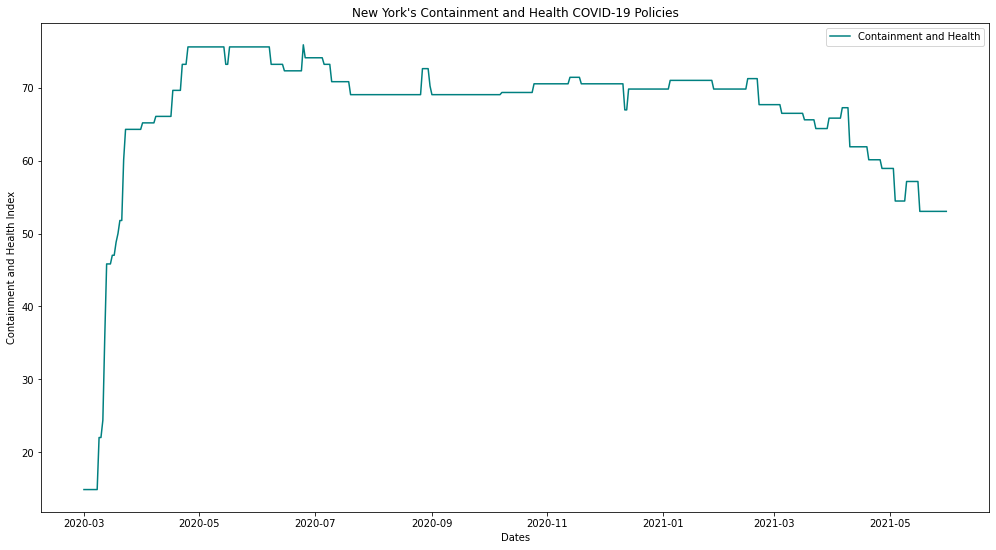

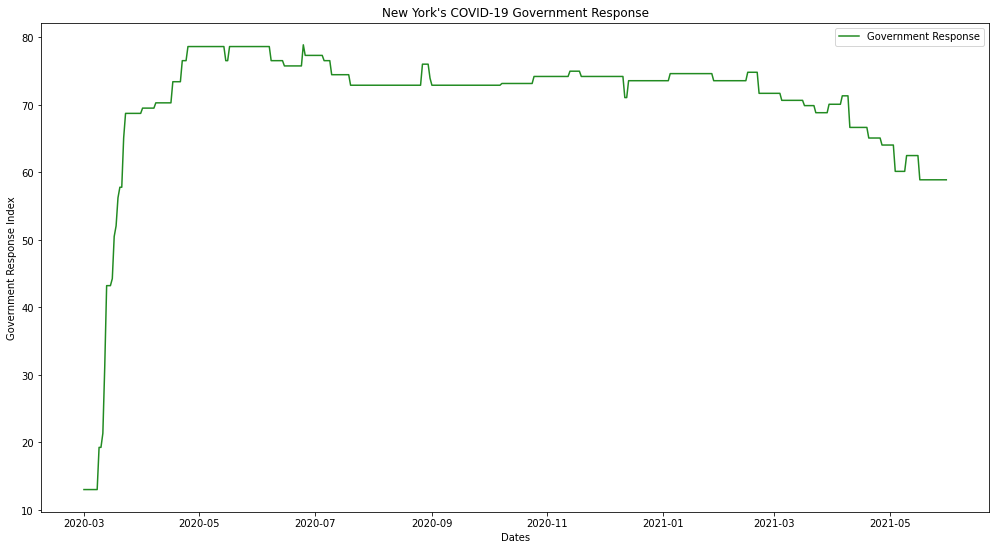

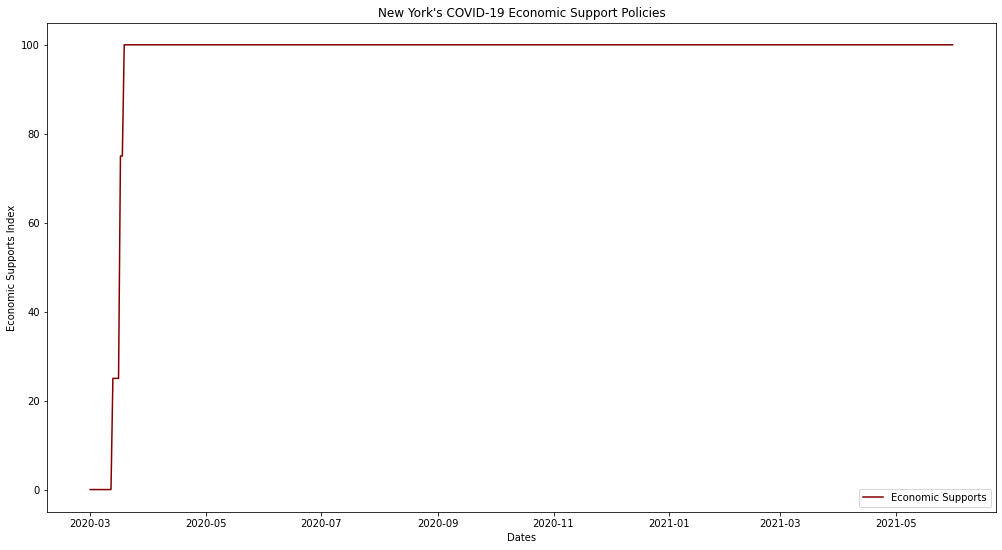

In [ ]:
# GOV 
date = newyork['Date'].unique()

stringency_NY = newyork['StringencyIndex']
plt.plot(date, stringency_NY, color = 'darkorange', label = 'Stringency')
plt.xlabel("Dates")
plt.ylabel("Stringency Index")
plt.title("Strigency of New York's COVID-19 Policies")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

containment_health_NY = newyork['ContainmentHealthIndex']
plt.plot(date, containment_health_NY, color = 'teal', label = 'Containment and Health')
plt.xlabel("Dates")
plt.ylabel("Containment and Health Index")
plt.title("New York's Containment and Health COVID-19 Policies")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

gov_response_NY = newyork['GovernmentResponseIndex']
plt.plot(date, gov_response_NY, color = 'forestgreen', label = 'Government Response')
plt.xlabel("Dates")
plt.ylabel("Government Response Index")
plt.title("New York's COVID-19 Government Response")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()


economic_supports_NY = newyork['EconomicSupportIndex']
plt.plot(date, economic_supports_NY, color = 'maroon', label = 'Economic Supports')
plt.xlabel("Dates")
plt.ylabel("Economic Supports Index")
plt.title("New York's COVID-19 Economic Support Policies")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

In [ ]:
# Importing covid-19 case and mortality data over time 
case = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
mortalities = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

In [ ]:
# filtering data to province and dates desired
filter1 = case['Province_State'] == 'New York'
newyork_cases = case[filter1]
newyork_cases = newyork_cases.iloc[: , 50:510] # filtering to desired dates 
newyork_cases_nums = newyork_cases.T
newyork_cases_nums[:3]

,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965
3/1/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3/2/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3/3/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# filtering data to province and dates desired
filter2 = mortalities['Province_State'] == 'New York'
newyork_deaths = mortalities[filter2]
newyork_deaths = newyork_cases.iloc[: , 50:510] # filtering to desired dates 
newyork_deaths_nums = newyork_deaths.T
newyork_deaths_nums[:3]

,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965
4/20/20,687,30,32399,199,34,36,25,73,78,51,111,25,49,2284,2192,20,13,27,119,86,3,49,54,39707,9,39,117,1054,35,30677,18057,255,279,646,71,6514,46,52,49,0,778,44828,186,10583,9457,254,295,20,8,18,110,195,28127,560,37,119,997,0,101,65,50,24306,44,10
4/21/20,704,30,32974,205,35,36,25,75,79,56,120,25,62,2331,2284,21,13,27,121,87,3,50,54,40317,9,39,117,1070,37,31079,18259,260,284,646,72,7029,53,52,49,0,807,45569,186,10742,9568,272,336,20,8,18,120,195,28701,592,37,123,1018,0,102,68,51,24656,44,10
4/22/20,737,30,33526,219,37,36,36,75,79,56,120,25,62,2391,2284,22,13,28,122,87,3,53,54,40977,9,39,121,1112,38,31555,18454,268,301,667,73,7152,56,52,49,0,831,46455,202,10884,9699,277,352,20,8,18,123,214,28854,592,39,123,1018,0,108,73,52,25276,44,11


In [ ]:
print('lenght:', len(newyork_cases_nums), len(newyork_deaths_nums))
print('shape:', newyork_cases_nums.shape, newyork_deaths_nums.shape)

lenght: 460 410
shape: (460, 64) (410, 64)


In [ ]:
newyork_cases_nums.index = pd.to_datetime(newyork_cases_nums.index) # converting to datetime
newyork_cases_nums.index = newyork_cases_nums.index.datetime.date # converting to just Year-Month-Day format 
newyork_cases_nums.index.head(1), newyork_cases_nums.index.tail(1)

newyork_mortalities.index = pd.to_datetime(newyork_mortalities.index) # converting to datetime
newyork_mortalities.index = newyork_mortalities.index.dt.date # converting to just Year-Month-Day format 
newyork_mortalities.index.head(1), newyork_mortalities.index.tail(1)

newyork_cases_nums.iloc[: ,63:]

In [ ]:
x_val = new_compound_scores.index
y_val = new_compound_scores

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(newyork_cases_nums.index, newyork_cases_nums.iloc[: ,63:], label = 'Cases', color = 'darkslateblue')
ax2.plot(x_val, y_val, color = 'salmon', label = 'Sentiments')
ax2.plot(x_val, neutral_line, color = 'darkslategrey', label='neutral')
ax2.plot(x_val, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed')
ax2.plot(x_val, neutral_range_b, color = 'lightslategrey', linestyle='dashed')
legend = ax.legend(loc='upper right', fontsize='medium')
legend2 = ax2.legend(loc='upper left', fontsize='medium')
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax2.set_ylabel('Sentiment Scores')
plt.title('New Cases and Daily Sentiment Scores')
plt.rc('figure', figsize=(17, 9))
plt.show()

####note the second axis - did not re-normalize the compound scores to fit the cases or deaths scales 

In [ ]:
newyork_mortalities['date_death_report']

In [ ]:
deaths_compound_scale = new_compound_scores[7:] # deaths data start 7 days after March 1st, 2020
x_val2 = deaths_compound_scale.index
y_val2 = deaths_compound_scale

x_d = newyork_mortalities['deaths']

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(x_val2, x_d, label = 'Deaths', color = 'darkseagreen')
ax2.plot(x_val2, y_val2, color = 'salmon', label = 'Sentiments')
ax2.plot(x_val2, neutral_line[7:], color = 'darkslategrey', label='neutral', linestyle='dashed')
ax2.plot(x_val2, neutral_range_t[7:], color = 'lightslategrey', label='neutral range', linestyle='dashed')
ax2.plot(x_val2, neutral_range_b[7:], color = 'lightslategrey', linestyle='dashed')
legend = ax.legend(loc='upper left', fontsize='medium')
legend2 = ax2.legend(loc='upper right', fontsize='medium')
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax2.set_ylabel('Sentiment Scores')
plt.title('New Deaths and Daily Sentiment Scores')
plt.rc('figure', figsize=(17, 9))
plt.show()

In [ ]:
# Going to save a new dataframe to use compound scores going forward 
normalized_scores = [] 
for t in tweet_Sentiment_data['Sentiment_Score']: 
  normalized_scores.append((t*50)+50)

tweet_Sentiment_data['Sentiment_Score_Norm'] = normalized_scores

In [ ]:
# Note that: 
  # positive sentiment: compound score >= 0.05
  # neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
  # negative sentiment: compound score <= -0.05

sentiments = [] 
for t in tweet_Sentiment_data['Sentiment_Score']:
  if t >= 0.05:
    sentiments.append('positive')
  elif t <= -0.05:
    sentiments.append('negative')
  else:
    sentiments.append('neutral')

tweet_Sentiment_data['Sentiment'] = sentiments

In [ ]:
tweet_Sentiment_data

In [ ]:
tweet_Sentiment_data.to_csv('/content/drive/MyDrive/Colab Notebooks/NEWYORK_COVID19_TWEETS_SENTS.csv')